# 1. Principal Component Analysis (PCA)
PCA is a technique that transforms features into a set of new, uncorrelated variables called principal components. These components are ordered by the amount of variance they explain.

__What to Observe__
- The explained variance ratio tells how much information is retained by each component.
- The scatter plot shows how PCA separates classes visually.    

Explained Variance Ratio:  [0.72962445 0.22850762]


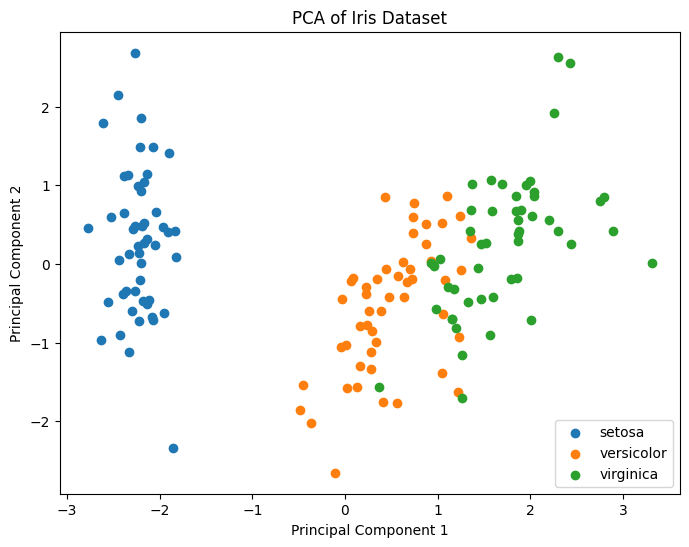

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [2]:
import numpy as np
import pandas as pd 
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load Iris Dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Standarizing the Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2) # Reduces to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

# Explained Variance Ratio
print('Explained Variance Ratio: ', pca.explained_variance_ratio_)

# Visualize the reduced data
plt.figure(figsize=(8,6))
for i, target_name in enumerate(data.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=target_name)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.show()
print(X)
print(y)

# 2. t-SNE for Visualization
__t-SNE__ (t-Distributed Stochastic Neighbor Embedding) is great for visualizing high-dimensional data in 2D or 3D, but it's not ideal for feature extraction.

__What to Observe__
- t-SNE is not deterministic, so results might vary.
- Useful for cluster visualization, even if the dataaset is high-dimensional.

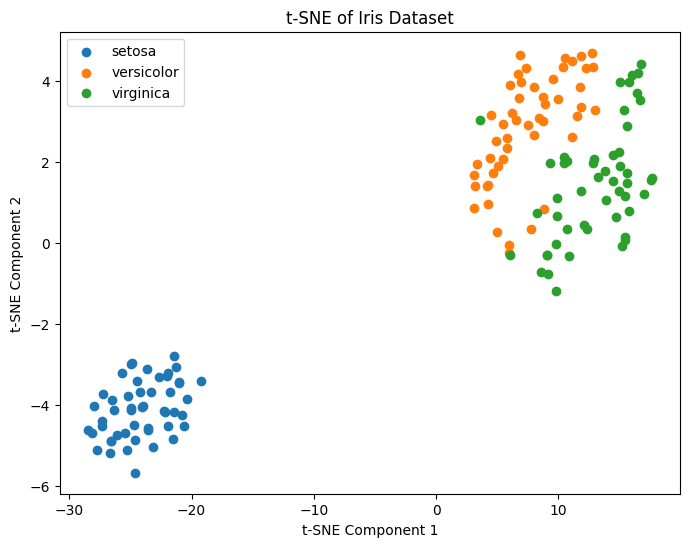

In [2]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualize the t-SNE results
plt.figure(figsize=(8,6))
for i, target_name in enumerate(data.target_names):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], label=target_name)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of Iris Dataset')
plt.legend()
plt.show()